Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

Необхідно виконати:

- Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
- Прочитайте отриману таблицю, використовуючи метод head
- Визначте розмір таблиці за допомогою методу shape
- Визначте типи всіх стовпців за допомогою dataframe.dtypes
- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
- Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
- Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
- Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
- Визначте новий розмір таблиці за допомогою методу shape
- Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
- Визначте розмір таблиці python_data за допомогою методу shape
- Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
- Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
- Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
- Створіть описову статистику за допомогою методу describe для нового стовпчика.
- Збережіть отриману таблицю в CSV файл

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = "2017_jun_final.csv"

In [102]:
# read data with read_csv
survey_data = pd.read_csv(data)

In [103]:
# read the head
survey_data.head

<bound method NDFrame.head of          N                 Должность Язык.программирования Специализация  \
0        1        Junior QA engineer                   NaN     Manual QA   
1        2        Junior QA engineer                   NaN     Manual QA   
2        3         Software Engineer               C#/.NET           NaN   
3        4         Software Engineer            JavaScript           NaN   
4        5  Senior Software Engineer            JavaScript           NaN   
...    ...                       ...                   ...           ...   
8699  8700               QA engineer                   NaN     Manual QA   
8700  8701                 Marketing                   NaN           NaN   
8701  8702  Junior Software Engineer            Ruby/Rails           NaN   
8702  8703                 Team lead                   NaN           NaN   
8703  8704  Senior Software Engineer                  Java           NaN   

     Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарп

In [104]:
# determine the shape
survey_data.shape

(8704, 25)

In [105]:
# determine dtypes
survey_data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [106]:
# number of missing values
survey_data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [107]:
# delete the columns with missing values
survey_data = survey_data.drop(['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls'], axis=1).copy()

In [108]:
# check the missing values again, making sure that only the programming language is left
survey_data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [109]:
# drop missing values
survey_data = survey_data.dropna().copy()

In [110]:
# check the shape of the dataframe
survey_data.shape

(4854, 20)

In [111]:
# create a new dataframe with only python programmers
python_data = survey_data.loc[survey_data['Язык.программирования'] == 'Python'].copy()

In [112]:
# determine the size of the dataframe
python_data.shape

(207, 20)

In [113]:
# group by "Посада"
python_data.groupby('Должность')

In [114]:
# aggregate the grouped data and find min and max salaries
aggregated_salaries = python_data.groupby('Должность').agg({'salary': ['min', 'max']}).copy()

In [115]:
# def fill_avg_salary that returns average salary per month and apply it to the dataframe to add a new column
def fill_avg_salary(series):
    return series.loc['salary'].mean()
    
aggregated_salaries['avg'] = aggregated_salaries.apply(fill_avg_salary, axis=1)


In [116]:
# create a descriptive statistics for an avg column
aggregated_salaries['avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [117]:
# create a new csv file
aggregated_salaries.to_csv('aggregated_salaries.csv')

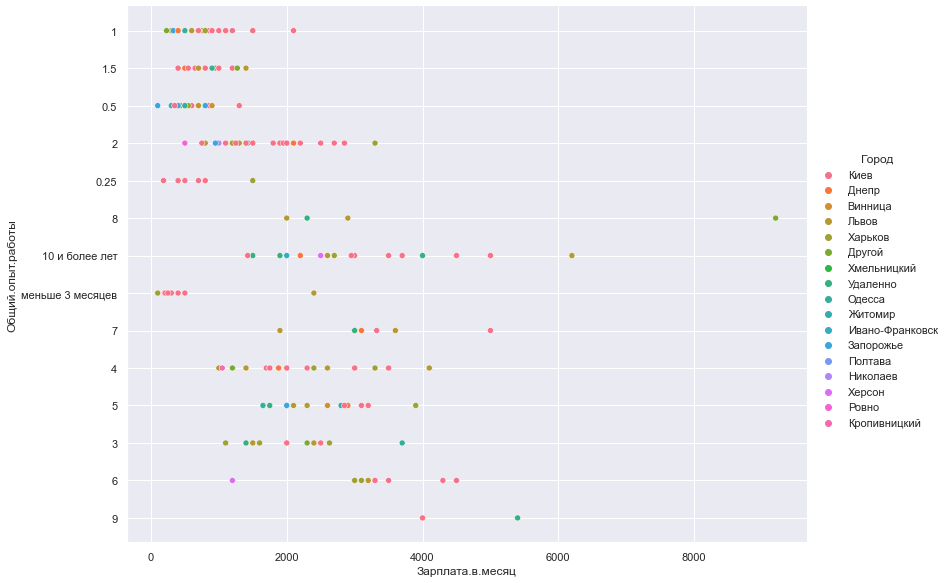

In [118]:
# experience vs salary among Python developers
sns.set_theme()
sns.relplot(
    data=python_data, x="Зарплата.в.месяц", y="Общий.опыт.работы",
    hue="Город", height=8.27, aspect=11.7/8.27,
)

<AxesSubplot:>

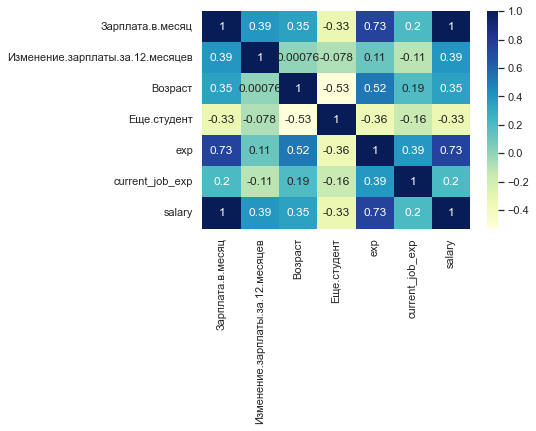

In [119]:
# correlation between features
sns.heatmap(python_data.drop(['N'], axis=1).corr(), cmap="YlGnBu", annot=True)

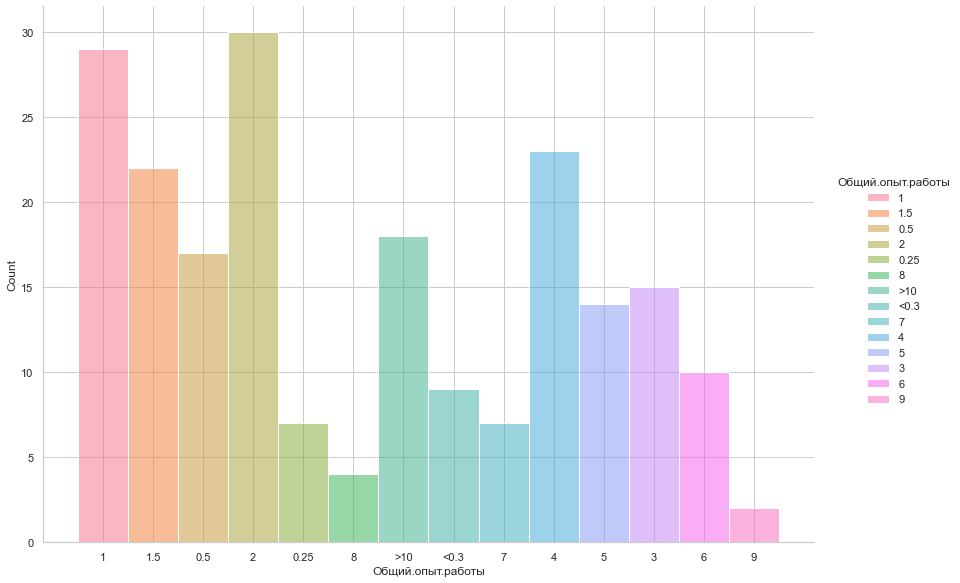

In [124]:
# distribution of developers with different experience 
sns.set_style('whitegrid')
python_data.loc[python_data['Общий.опыт.работы'] == 'меньше 3 месяцев'] = '<0.3'
python_data.loc[python_data['Общий.опыт.работы'] == '10 и более лет'] = '>10'
sns.displot(data=python_data, x='Общий.опыт.работы', kde=True, height=8.27, aspect=11.7/8.27, hue='Общий.опыт.работы')